## Bike sharing a feasible scheme or not?
## by (Chigozie Chukwu)

## Introduction
 This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. it has 16 columns including duration_sec; this is the time interval each user rides the bike from one point to another, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id; this is the identity number of each bike, user_type; shows whether a particular user is a subscriber or customer to the bike sharing scheme, member_birth_year, member_gender, bike_share_for_all_trip; indicates if users rides bike all the all distance being covered. This data set has about 183412
 entries.



## Preliminary Wrangling


In [1]:
# I imported all python packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

I Loaded my dataset using the .head() method


In [2]:
bikeshare = pd.read_csv('bike_sharing.csv')
bikeshare.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


I used the .info() to get the general properties of my data set

In [3]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


I used .describe() to get the mean, mode, standard deviation, etc.

In [4]:
bikeshare.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


I noticed there are null values in the dataset so, I will perform some preliminary wrangling 

## QUESTION
How many null values are in the dataset?

## CODE

In [5]:
## Using the method .isna().sum() to get the total of null values in each column
bikeshare.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

I noticed there are columns i might not use in that course of this exploration. So, i will drop them. Then, i am going to create a bar chart to represent the null values.

In [6]:
## dropping columns that might not be used for this exploration
na_counts = bikeshare.drop(['start_time', 'end_time', 'start_station_longitude', 'end_station_longitude'], axis=1).isna().sum()
print(na_counts)

duration_sec                  0
start_station_id            197
start_station_name          197
start_station_latitude        0
end_station_id              197
end_station_name            197
end_station_latitude          0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64


Text(0.5,1,'Missing value counts')

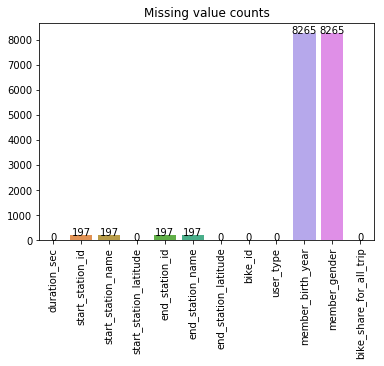

In [7]:
## plotting
sb.barplot(na_counts.index.values, na_counts)

# getting the current tick locations and labels
plt.xticks(rotation=90) 

# Using logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count+300, count, ha = 'center', va='top')
plt.title('Missing value counts')

## OBSERVATION
This shows that member birth year and gender has greater missing values than the rest of the columns.

I will drop the null values since they are many. i used the .dropna() method

In [12]:
bikeshare1 = bikeshare.dropna()
bikeshare1

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No
10,458,2019-02-28 23:57:57.2110,2019-03-01 00:05:35.4350,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes


## TEST

In [13]:
bikeshare1.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### Structure of bikeshare dataset?

Bikeshare data set contains 16 columns and 183412 rows

### The main feature(s) of interest in bikeshare dataset?

The main features of interest includes;

- How many user_type ride the bike?
- What is the proportion of each gender that were involved in bike sharing?
- How many used bike for all trips?
- What is the distribution of the duration sec?
- What is the distribution of the start and end station_latitude?
- What is the distribution of the bike id?
- Which birth_year used bike_sharing the most?

### Features in the dataset that will support my investigation into the feature(s) of interest?

- duration_sec
- user_type
- member_gender
- member_birth_year
- bike_share_for_all_trip
- start_station_latitude
- end_station_latitude

## QUESTION
How many user_type ride the bike?

## CODE

In [15]:
## setting the base color for my charts to avoid multiple colors
base_color = sb.color_palette()[0]

Text(0.5,1,'COUNTS OF EACH USER_TYPE')

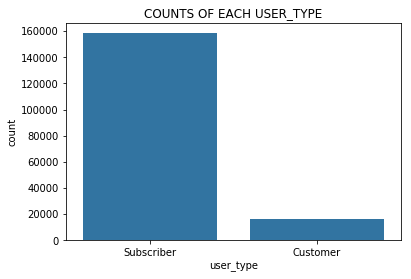

In [16]:
## To arrange my bars in decreasing order
gen_order = bikeshare1['user_type'].value_counts().index
## plotting the bars
sb.countplot(data=bikeshare1, x='user_type', color=base_color, order=gen_order);
plt.title('COUNTS OF EACH USER_TYPE')

## OBSERVATION

The bar chart shows that there are more subscribers to the bike sharing scheme than there are customers. Could this mean that subscribers are the daily users. We will find out.

## QUESTION

What is the proportion of each gender that were involved in bike sharing?

## CODE

Text(0.5,1,'Proportion of each gender that were involved in bike sharing')

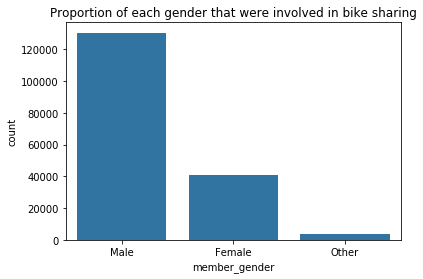

In [17]:
## arranging the bars in decreasing order
gen_order = bikeshare1['member_gender'].value_counts().index
## plotting
sb.countplot(data=bikeshare1, x='member_gender', color=base_color, order=gen_order);
plt.title('Proportion of each gender that were involved in bike sharing')

## OBSERVATION

Obviously, the number of males were above 120000, while that of females that were involved in bike sharing were not up to half of male. the counts of population that were not male nor female was appproximately 5000.

## QUESTION

How many used bike for all trips?

## CODE

Text(0.5,1,'Bike usage for all trips')

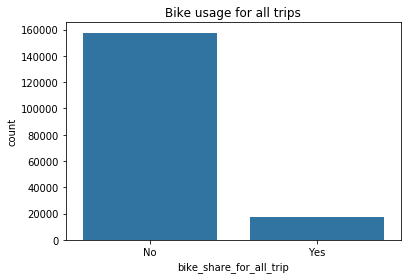

In [18]:
## plotting
sb.countplot(data=bikeshare1, x='bike_share_for_all_trip', color=base_color);
plt.title('Bike usage for all trips')

## OBSERVATION
The chart shows that the proportion of members that used the bike sharing scheme for all trips were not up to 20000. Majority didn't use the scheme for all trips.

## QUESTION

What is the distribution of the duration sec?

## CODE

[61, 10000, 0, 300]

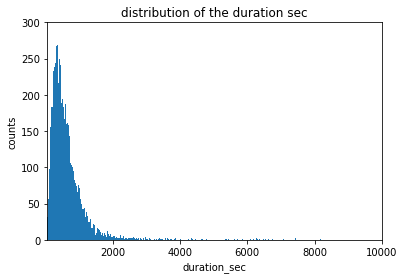

In [19]:
## Setting my bin edges for better view of the chart
bin_edges = np.arange(0, bikeshare1['duration_sec'].max()+1, 1)
## plotting
sb.distplot(bikeshare1['duration_sec'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1})
plt.title('distribution of the duration sec')
plt.ylabel('counts')
x_min = 61
x_max = 10000
y_min = 0
y_max = 300
plt.axis([x_min, x_max, y_min, y_max])

## OBSERVATION

The histogram is skewed to the right. This might indicate that there was an initial success in the bike sharing scheme as more members were involved. This also indicates that the mean was greater than the median, which is greater than the mode. 

## QUESTION
What is the distribution of the start and end station_latitude?

## CODE

Text(0,0.5,'counts')

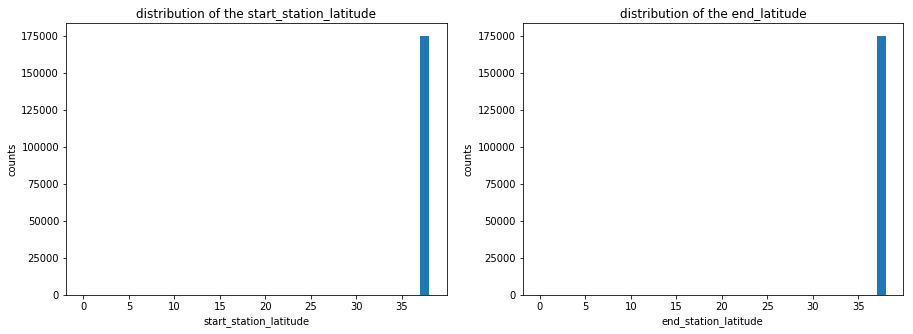

In [20]:
## setting my figsize
plt.figure(figsize = [15, 5])
## subplot one
plt.subplot(1,2,1)
bin_edges = np.arange(0, bikeshare1['start_station_latitude'].max()+1, 1)
sb.distplot(bikeshare1['start_station_latitude'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1})
plt.title('distribution of the start_station_latitude')
plt.ylabel('counts')
## subplot two
plt.subplot(1,2,2)
bin_edges = np.arange(0, bikeshare1['end_station_latitude'].max()+1, 1)
sb.distplot(bikeshare1['end_station_latitude'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1})
plt.title('distribution of the end_latitude')
plt.ylabel('counts')


## OBSERVATION
This shows that the starting and ending latitude are within same location. Members most likely didn't travel long distances with the bike.

## QUESTION
What is the distribution of the bike id?

## CODE

Text(0.5,0,'bike_id')

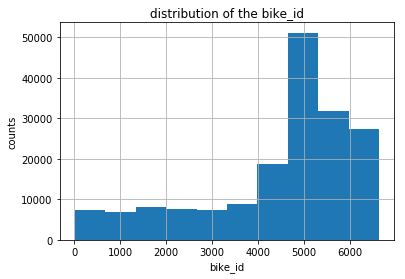

In [21]:
## plotting
bikeshare1.hist(column='bike_id')
plt.title('distribution of the bike_id')
plt.ylabel('counts')
plt.xlabel('bike_id')

## OBSERVATION
The distribution of the bike id skewed to the left. This might indicate an intial less number using the bike sharing scheme.

## QUESTION
Which birth_year used bike_sharing the most?

## CODE

Text(0.5,1,'distribution of members birth year')

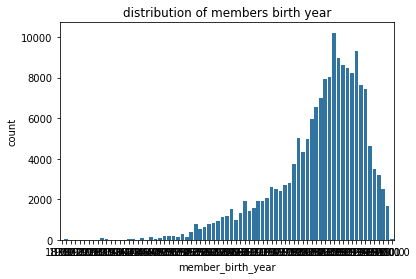

In [22]:
## plotting
sb.countplot(data=bikeshare1, x='member_birth_year', color=base_color)
plt.title('distribution of members birth year') 

## OBSERVATION
The  chart shows that the older age group uses the bike less often than the newer generations.

### The distribution(s) of variable(s) .

There were more subscribers to the bike sharing scheme than there are customers and the proportion of members that used the bike sharing scheme for all trips were not up to half of those that did not use it. Males used the bike more than the female and other genders.
The charts also indicates that there was an initial success in the bike sharing scheme and the younger generations utilized the bike sharing scheme more than the older adults.
The members  did covered smaller distance with the bike and rarely used it for all trips.


### Unusual distributions discovered and operations performed to tidy the data.

 I calculated the total of null values and dropped columns that might not be used. Most of the variables were skewed to the left

## Bivariate Exploration


## QUESTION
What is the relationship between member birth year and duration_sec?

## CODE

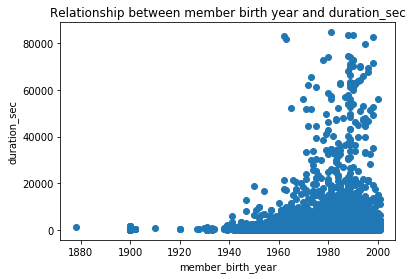

In [23]:
## plotting
plt.scatter(data = bikeshare1, x = 'member_birth_year', y = 'duration_sec', alpha = 1)
plt.xlabel('member_birth_year')
plt.ylabel('duration_sec')
plt.title('Relationship between member birth year and duration_sec');

## OBSERVATION
This indicates that the duration of time spent riding the bike were lower for the older generation than the new generartions. Looking at the chart, there are greater dense areas between 1960 and 2000, showing that this birth_year group uses the bike frequently. Although, the time spent ridin the bike was below 20000. Those born in 1980 through 2000, sparsely rode that bike for a longer duration.

## QUESTION
What is the relationship between these variables?
start_station_latitude and end_station_latitude,
start_station_longitude and end_station_longitude,
start_station_latitude and start_station_longitude,
end_station_latitude and end_station_longitude

## CODE

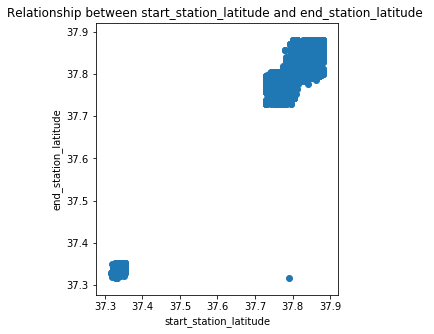

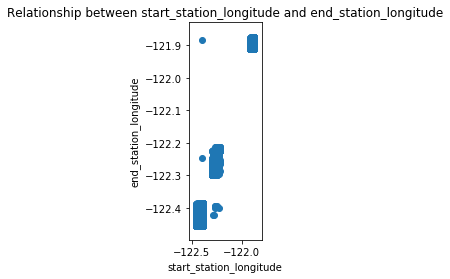

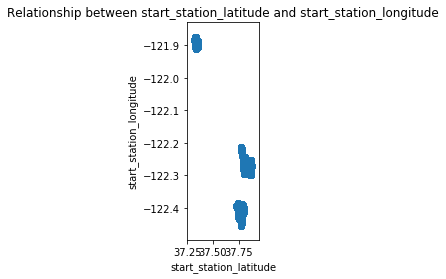

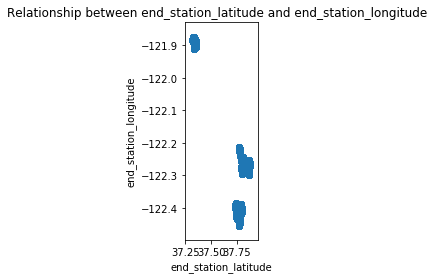

In [24]:
## setting my figsize
plt.figure(figsize = [20, 5])
## subplot one
plt.subplot(1,4,1)
plt.scatter(data = bikeshare1, x = 'start_station_latitude', y = 'end_station_latitude', alpha = 1)
plt.xlabel('start_station_latitude')
plt.ylabel('end_station_latitude')
plt.title('Relationship between start_station_latitude and end_station_latitude ')
plt.show()
## subplot two
plt.subplot(1,4,2)
plt.scatter(data = bikeshare1, x = 'start_station_longitude', y = 'end_station_longitude', alpha = 1)
plt.xlabel('start_station_longitude')
plt.ylabel('end_station_longitude')
plt.title('Relationship between start_station_longitude and end_station_longitude')
plt.show()
## subplot three
plt.subplot(1,4,3)
plt.scatter(data = bikeshare1, x = 'start_station_latitude', y = 'start_station_longitude', alpha = 1)
plt.xlabel('start_station_latitude')
plt.ylabel('start_station_longitude')
plt.title('Relationship between start_station_latitude and start_station_longitude')
plt.show()
## subplot four
plt.subplot(1,4,4)
plt.scatter(data = bikeshare1, x = 'end_station_latitude', y = 'end_station_longitude', alpha = 1)
plt.xlabel('end_station_latitude')
plt.ylabel('end_station_longitude')
plt.title('Relationship between end_station_latitude and end_station_longitude  ')
plt.show()



## OBSERVATION
This shows that the distances covered by the members of the bike sharing scheme were not long and tend to be close. In otherwords, the distances between the start point and end end point are close.

## QUESTION
What are the relationship between the following?
start_station_latitude and duration_sec,
end_station_latitude and duration_sec.

## CODE

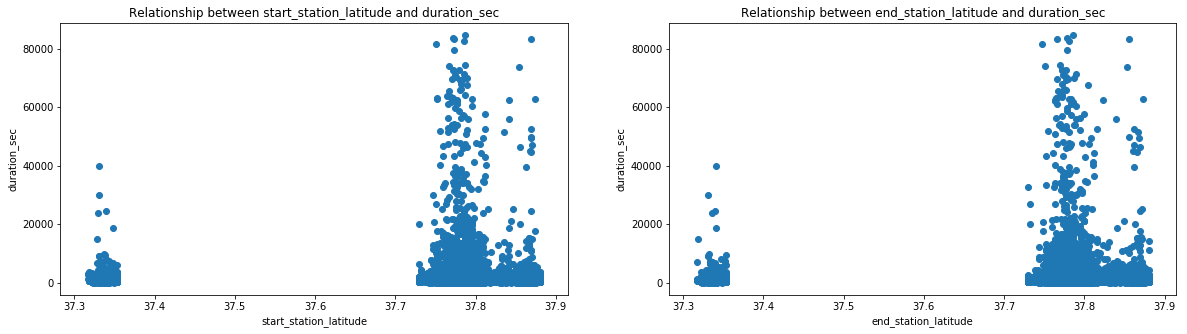

In [25]:
## setting my figsize
plt.figure(figsize = [20, 5])
## subplot one
plt.subplot(1,2,1)
plt.scatter(data = bikeshare1, x = 'start_station_latitude', y = 'duration_sec', alpha = 1)
plt.xlabel('start_station_latitude')
plt.ylabel('duration_sec')
plt.title('Relationship between start_station_latitude and duration_sec');
## subplot two
plt.subplot(1,2,2)
plt.scatter(data = bikeshare1, x = 'end_station_latitude', y = 'duration_sec', alpha = 1)
plt.xlabel('end_station_latitude')
plt.ylabel('duration_sec')
plt.title('Relationship between end_station_latitude and duration_sec');

## OBSERVATION
This shows that members of the bike sharing scheme started and ended their trip at similar location. 

## QUESTION
What is the relationship between user_type and member_gender?

## CODE

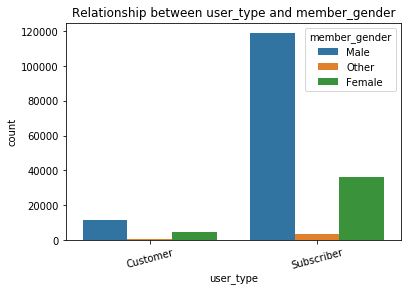

In [26]:
## plotting
sb.countplot(data = bikeshare1, x = 'user_type', hue = 'member_gender')
plt.title('Relationship between user_type and member_gender')
plt.xticks(rotation = 15);

## OBSERVATION
The bar chart indicates that for both customers and subscribers, males were greater than female and other genders represents the least of the population.

## QUESTION
What is the relationship between user_type and bike_share_for_all_trips?

## CODE

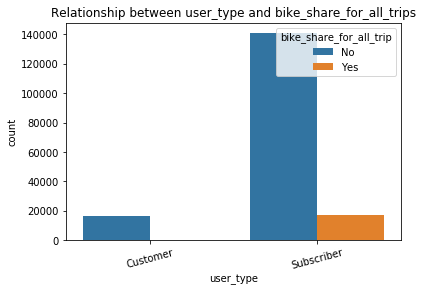

In [27]:
## plotting
sb.countplot(data = bikeshare1, x = 'user_type', hue = 'bike_share_for_all_trip')
plt.title('Relationship between user_type and bike_share_for_all_trips')
plt.xticks(rotation = 15);

## OBSERVATION
This shows that all the customers of the bike sharing scheme did not use the bike for all their trips, while subcribers about 15000 did use bike for all their trip. 

## QUESTION
What is the relationship between member_gender and bike_share_for_all_trips?

## CODE

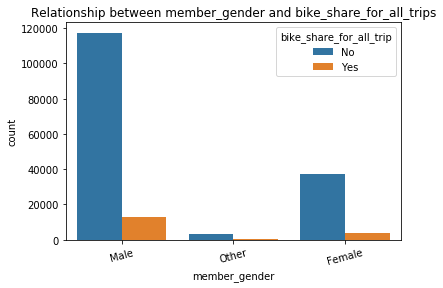

In [28]:
## plotting
sb.countplot(data = bikeshare1, x = 'member_gender', hue = 'bike_share_for_all_trip')
plt.title('Relationship between member_gender and bike_share_for_all_trips')
plt.xticks(rotation = 15);

## OBSERVATION
The chart depicts that more males used bikes for all trips than females.

### Relationships observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset.

This exploratory analysis shows that the total members were more of males and most of them were subcribers to the scheme. Although, most of them did not use the bike in the sharing scheme for all their trips, they all covered a smilar distances with the bike.Those of younger age group spent more time(in seconds) riding the bike than those of older generation.

### Some interesting relationships between the other features.

I observed that the differences between the starting latitude and ending latitude were not much. This shows that most of the riders were located in similar locations and travelled to same locations.

## Multivariate Exploration

## QUESTION
What is the relationship between member_gender, member_birth_year and duration_sec?

## CODE

Text(0.5,1,'Relationship between member_gender, member_birth_year and duration_sec')

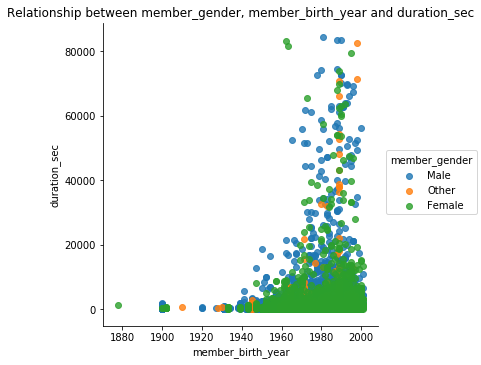

In [29]:
## plotting
sb.lmplot(x='member_birth_year', y='duration_sec', hue='member_gender', data = bikeshare1, fit_reg=False)
plt.title('Relationship between member_gender, member_birth_year and duration_sec')

## OBSERVATION

There are 3 points for male, 3 points for female and one point for others noticed at the top of the duration_sec and just 1 point for female seen at the right corner. This shows that the proprtion of male and female that used the bike for a longer duration were equal, while only a few others rode the bike for that same duration. Interestingly, this chart shows that only one female born in the 1880's used the bike, despite the duration of its use being about 1000secs.

## QUESTION
What is the relationship between user_type, member_birth_year and duration_sec?

## CODE

Text(0.5,1,'Relationship between user_type, member_birth_year and duration_sec')

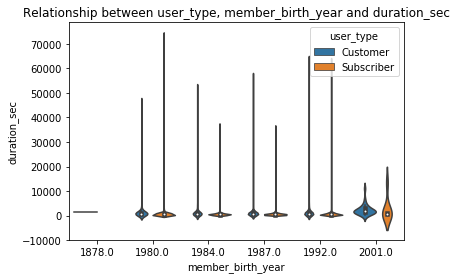

In [32]:
## Using .loc() method to select the years to plot
c = bikeshare1.loc[bikeshare1['member_birth_year'].isin(['1878', '1980', '1984', '1987', '1992', '2001'])]
## plotting
sb.violinplot(x = 'member_birth_year', y = 'duration_sec', hue = 'user_type', data = c)
plt.title('Relationship between user_type, member_birth_year and duration_sec')

## OBSERVATION

This chart depicts that the time spent riding the bike were approximately similar for members born from 1878 to 1992. Those members born in 2001 rarely used the bike for a longer duaration.
In general, subscribers to the bike sharing scheme rode on the bike more often than the customers.

## QUESTION

What is the relationship between member gender, user type and duration_sec?

## CODE

Text(0.5,1,'Relationship between member gender, user type and duration_sec')

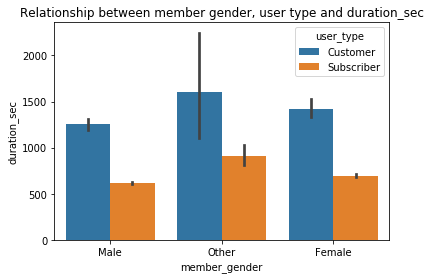

In [33]:
## plotting
sb.barplot(data = bikeshare1, x = 'member_gender', y = 'duration_sec', hue = 'user_type')
plt.title('Relationship between member gender, user type and duration_sec')

## OBSERVATION
This chart depicts that customers who fall under other gender used the bike for a longer duration, while the male customers travelled the least distance. This pattern is same for those who subscribed to the scheme.

### Relationships observed in this part of the investigation.

This part of exploration help strengthen the patterns seen during the bivariant and univariant visualization. Looking at the charts above, it can be clearly seen that the total of male and female that rode on the bike used for the scheme for a greater duration of time were almost similar. I also noticed that the total number of subscibers and customers that rode the bike that were born in 2001, only used the bike for a shorter duration of time.
### Surprising interactions between features.

Interestingly, just one member(a female) born in the 1880's rode the bike for some seconds during the bike sharing scheme. The chart depicts that customers and subcribers who fall under other gender used the bike for a longer duration, which contrast that of the male and female.

## Conclusions
This is my third Udacity project, where I dowloaded a  bike share dataset, performed a little wrangling, since this was a cleaned dataset. Afterwards, I performed exploratory analysis on the dataset to answer some questions. Below are my main findings.
This analysis shows that during the bike sharing scheme in greater San Francisco Bay area, subcribers to the scheme used the bike for all their trips, most of which were males and  were born between 1990's and 2001. Males and females members of the scheme tend to use the bike for a longer duration of time than the other genders. Also, customers who fall under other gender used the bike for a longer duration. The locations traveled with the bike revolves round similar region, which proves that this scheme actually took place in a particular region.
The exploration also depicts that there was an intial success to the scheme, which continued over time. 

Bike sharing scheme was good adventure as this analysis proves it and need to continue. 